Day-1 13-08-2022

In [65]:
import pandas as pd
import numpy as np

In [66]:
adult_df=pd.read_csv(r'C:\Users\LAPSHOP.IN\Downloads\python\Logistic Regression\Adult DataSets\adult_data.csv', header=None, delimiter= ' *, *')
adult_df.head()

C:\Users\LAPSHOP.IN\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [67]:
adult_df.shape

(32561, 15)

In [68]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
adult_df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Pre Processing The Data

In [70]:
# create a copy of the data frame
adult_df_rev=pd.DataFrame.copy(adult_df)

In [71]:
adult_df_rev.drop(["education", "fnlwgt"], axis=1,inplace=True)
adult_df_rev.shape

(32561, 13)

In [72]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [73]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [74]:
#to check if there are any values which are not acceptable like special characters,
# string into integers, etc for knowledge to know any misplace observation.
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [75]:
adult_df_rev=adult_df_rev.replace('?',np.nan)

In [76]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [77]:
# replace the missing values with mode values. # In mode we should be always be giving indexing,
# so that the data will be traverse through that only.
for value in ['workclass', 'occupation', 'native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [78]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [79]:
"""
it should not be used on 1st based solution for missing values. 
1st we need to see that the data should be handle manually. 
if there isn't data should be handled be manually we need to go with the for loop

for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""

"\nit should not be used on 1st based solution for missing values. \n1st we need to see that the data should be handle manually. \nif there isn't data should be handled be manually we need to go with the for loop\n\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

In [80]:
adult_df_rev.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [81]:
# manual encoding using the map function
# adult_df_rev.sex.map({"Female":0, "Male":1}, inplace=True)

#  Dummy Variables Using pd.get_dummies()

In [82]:
adult_df_rev_new=pd.get_dummies(adult_df_rev)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [83]:
adult_df_rev_new.shape

(32561, 90)

In [84]:
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [85]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
    """
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    """

In [86]:
adult_df_rev.head()

#0--> <=50k
#1--> >50k

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [87]:
adult_df_rev.shape

(32561, 13)

In [88]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [89]:
"""
Preprocessing of data:
1. Feature selection
2. Handling missing values [Mandatory]

Converting categorical values to numerical[Mandatory]
1.Manual encoding-->map()
df["Smoker"]=df["Smoker"].map({"yes":1,"no":0})

2.Create dummy variables-->pd.get_dummies(), OneHotEncoder()
Gender-->F,M,U
Gender_F    Gender_M    Gender_U
1        0        0
0        1        0
0        0        1

3.Creating levels-->LabelEncoder()
a. Identify the unique values present in the variable
b. Create a dictionary object into the memory with the unique values as the keys and map the labels to the keys in ascending alphabetical order
    {"Private":2
    "Self-emp":3
    "Local-gov":1
    "Fed-gov":0
    }
c. Map the values into the actual variable and transform it.
2
2
0
2
1
"""

'\nPreprocessing of data:\n1. Feature selection\n2. Handling missing values [Mandatory]\n\nConverting categorical values to numerical[Mandatory]\n1.Manual encoding-->map()\ndf["Smoker"]=df["Smoker"].map({"yes":1,"no":0})\n\n2.Create dummy variables-->pd.get_dummies(), OneHotEncoder()\nGender-->F,M,U\nGender_F    Gender_M    Gender_U\n1        0        0\n0        1        0\n0        0        1\n\n3.Creating levels-->LabelEncoder()\na. Identify the unique values present in the variable\nb. Create a dictionary object into the memory with the unique values as the keys and map the labels to the keys in ascending alphabetical order\n    {"Private":2\n    "Self-emp":3\n    "Local-gov":1\n    "Fed-gov":0\n    }\nc. Map the values into the actual variable and transform it.\n2\n2\n0\n2\n1\n'

In [90]:
# arrays works faster than the dataframe. 
X=adult_df_rev.values[:,0:-1]  #--> to -2
Y=adult_df_rev.values[:,-1]

In [91]:
print(X.shape)
print(Y.shape)

(32561, 12)
(32561,)


In [92]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
# print(X)

In [93]:
print(X)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


In [94]:
#np.set_printoptions(thresold=np.inf)

In [95]:
# to convert y variable data type to integer. if there is any other data type as object data type
Y=Y.astype(int)

###  Running A Basic Model

In [96]:
# building a model
from sklearn.model_selection import train_test_split

#split the data into test and train
#random_state=10 will be the same random split and not randomly all the time we run the kernal
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [97]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22792, 12)
(22792,)
(9769, 12)
(9769,)


In [98]:
from sklearn.linear_model import LogisticRegression

# create a model object
classifier=LogisticRegression()

# fitting training data to the model object--> fit function will fit the variables in the model
classifier.fit(X_train,Y_train)

# predict using the model
Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 1 ... 0 0 1]


In [99]:
#print(list(zip(Y_test,Y_pred)))

print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)
#classifier.coef_

[('age', 0.4791423453332531), ('workclass', -0.10451761549954898), ('education_num', 0.8631082873763223), ('marital_status', -0.34832938621215265), ('occupation', -0.01659932216554021), ('relationship', -0.18082614346885206), ('race', 0.11572266078536013), ('sex', 0.42819520292599494), ('capital_gain', 2.426869091662701), ('capital_loss', 0.28596835719510494), ('hours_per_week', 0.3795495865804008), ('native_country', 0.008818008059065456)]
[-1.50218566]


In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Of The Model:", acc)

[[7017  406]
 [1316 1030]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy Of The Model: 0.8237281195618794


DAY-3 20-08-2022

**Adjusting The Thresold**

In [101]:
# store the predicted probabilities
Y_pred_prob= classifier.predict_proba(X_test)
print(Y_pred_prob)

[[0.96864499 0.03135501]
 [0.97033947 0.02966053]
 [0.23875257 0.76124743]
 ...
 [0.81409863 0.18590137]
 [0.82534471 0.17465529]
 [0.15672829 0.84327171]]


In [102]:
Y_pred_class=[]
for value in Y_pred_prob[:,1]:
    if value > 0.46:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred_class)
print(cfm)

print("Classification Report: ")

print(classification_report(Y_test,Y_pred_class))

acc=accuracy_score(Y_test,Y_pred_class)
print("Accuracy Of The Model:", acc)

[[6910  513]
 [1208 1138]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.49      0.57      2346

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy Of The Model: 0.8238304841846658


In [104]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])
    
# whenever we check 

Errors at threshold  0.4 : 1768  , type 2 error : 1072  , type 1 error: 696
Errors at threshold  0.41000000000000003 : 1747  , type 2 error : 1096  , type 1 error: 651
Errors at threshold  0.42000000000000004 : 1749  , type 2 error : 1115  , type 1 error: 634
Errors at threshold  0.43000000000000005 : 1760  , type 2 error : 1144  , type 1 error: 616
Errors at threshold  0.44000000000000006 : 1752  , type 2 error : 1168  , type 1 error: 584
Errors at threshold  0.45000000000000007 : 1734  , type 2 error : 1189  , type 1 error: 545
Errors at threshold  0.4600000000000001 : 1721  , type 2 error : 1208  , type 1 error: 513
Errors at threshold  0.4700000000000001 : 1718  , type 2 error : 1233  , type 1 error: 485
Errors at threshold  0.4800000000000001 : 1727  , type 2 error : 1268  , type 1 error: 459
Errors at threshold  0.4900000000000001 : 1722  , type 2 error : 1295  , type 1 error: 427
Errors at threshold  0.5000000000000001 : 1722  , type 2 error : 1316  , type 1 error: 406
Errors at

In [105]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.8510163280208206


In [106]:
#AUC=0.5--> worst--> Random Guesses
#AUC=0.5-0.6--> poor
#AUC=0.6-0.7--> bad
#AUC=0.7-0.8--> good
#AUC=0.8-0.9--> very good
#AUC=0.9-1.0--> excellent

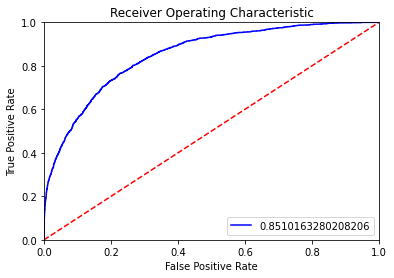

In [107]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [108]:
from sklearn import metrics
# Y_pred_class is the list of predicted values on the basis of 
fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred_class)
auc = metrics.auc(fpr,tpr)

print(auc)
print(fpr)
print(tpr)

0.7079857322331378
[0.         0.06910952 1.        ]
[0.         0.48508099 1.        ]


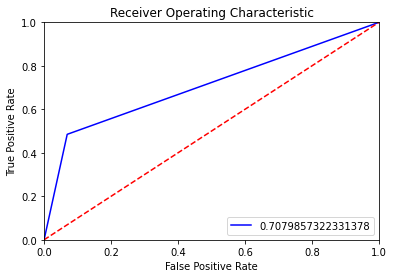

In [109]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

**AUC:
** 1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
** 2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error) 
** 3. Finally conclude upon the threshold which gives you an AUC closest to the overall AUC.**

Day-4  21-08-2022

#  SGD Classifier

In [110]:
from sklearn.linear_model import SGDClassifier
#create a model
classifier=SGDClassifier(loss="log",random_state=10,learning_rate="constant",
                         eta0=0.00001,max_iter=1000, shuffle=True,
                        early_stopping=True,n_iter_no_change=5)
#loss=hinge it is used for (Support Vector Machines)
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

#print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
#print(classifier.intercept_)

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Of The Model:", acc)

[[6632  791]
 [1052 1294]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7423
           1       0.62      0.55      0.58      2346

    accuracy                           0.81      9769
   macro avg       0.74      0.72      0.73      9769
weighted avg       0.80      0.81      0.81      9769

Accuracy Of The Model: 0.8113420002047292


In [112]:
classifier.n_iter_

6

In [113]:
classifier.t_

136753.0

# Cross Validation

1. K-Fold Validation

In [114]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.83333333 0.8254386  0.82799473 0.82755595 0.82492321 0.81965774
 0.825362   0.82755595 0.81483107 0.81088197]
0.8237534545006658


In [115]:
#model tuning

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Of The Model:", acc)

[[7013  410]
 [1315 1031]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy Of The Model: 0.8234210256935203


Day-5 27-08-2022

In [117]:
colname=adult_df_rev.columns

In [118]:
from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=10)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) 

Num Features:  10
Selected Features: 
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 1 1 1 2 1 1 1 1 1 1 3]


In [119]:
Y_pred=model_rfe.predict(X_test)
# print(list(zip(Y_test,Y_pred)))

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Of The Model:", acc)

[[7019  404]
 [1317 1029]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy Of The Model: 0.8238304841846658


In [121]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""
#in case the RFE eliminates logically relevant variables, create a  new df manually by subsetting the vaiables derived from RFE as well as on the basis of domain knowledge.
#rest of the model building steps will have to be performed manually

"new_data=adult_df_rev[['age','workclass','occupation','sex','income']]\nnew_data.head()\nnew_X=new_data.values[:,:-1]\nnew_Y=new_data.values[:,-1]\nprint(new_X)\nprint(new_Y)\n"

##### Featurre Selection Using Univariate Selection Technique

In [129]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [123]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


test = SelectKBest(score_func=chi2, k=10)
fit1 = test.fit(X, Y)

print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X = fit1.transform(X) 
#chi_square does not work on negative data, which we we already standardised the data.
# we will need to standardised the data again

[8.60061182e+03 9.35436386e-02 2.40142178e+03 1.12346982e+03
 1.00356439e+02 3.65914312e+03 3.30313051e+01 5.02439419e+02
 8.21924671e+07 1.37214589e+06 6.47640900e+03 1.74341889e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]


In [124]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
# print(X)

In [125]:
# building a model
from sklearn.model_selection import train_test_split

#split the data into test and train
#random_state=10 will be the same random split and not randomly all the time we run the kernal
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [126]:
from sklearn.linear_model import LogisticRegression

# create a model object
classifier=LogisticRegression()

# fitting training data to the model object--> fit function will fit the variables in the model
classifier.fit(X_train,Y_train)

# predict using the model
Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 1 ... 0 0 1]


In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification Report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy Of The Model:", acc)

[[7018  405]
 [1318 1028]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy Of The Model: 0.8236257549390931


#### Feature Selection Using Based On Variance

In [130]:
# it should be run without scaling the data
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0)
fit1 = vt.fit(X, Y)
print(fit1.variances_)

features = fit1.transform(X)
print(features.shape[1])
print(list(zip(adult_df_rev.columns,fit1.get_support())))

[7.30000000e+01 1.22584081e+00 6.61868663e+00 2.26863420e+00
 1.30000000e+01 2.58163360e+00 7.20448827e-01 2.21369502e-01
 9.99990000e+04 4.35600000e+03 9.80000000e+01 3.66745732e+01]
12
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]
